In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!ls

 BankChurners.csv  'Checkpoint #3.ipynb'


In [8]:
%cd drive/MyDrive/UFC/Mineração\ de\ Dados

/content/drive/MyDrive/UFC/Mineração de Dados


In [1]:
!pip install scikit-plot
!pip install plotly
!pip install seaborn
!pip install imblearn

In [10]:
import pandas as pd
import numpy as np
import seaborn as sn
import statistics
import scikitplot as skplt
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit, cross_val_score
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE 

## Modelos a serem usados na Regressão

In [11]:
from sklearn.linear_model import SGDRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

## Modelos a serem usados na Classificação

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold

## Métricas

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Importando o dataset

In [14]:
bank_df = pd.read_csv('BankChurners.csv')

In [15]:
bank_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# Regressão

### Eliminação de algumas colunas

In [16]:
bank_df.drop(columns=bank_df.columns[-2:], inplace=True)

In [17]:
bank_df.drop(columns=['Card_Category'], inplace=True)

In [18]:
bank_df.drop(columns=['CLIENTNUM'], inplace=True)

### Verificação se existem variáveis com valores vazios (N/A) 

In [19]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

### Transformação da faixa de salário em categorias

In [20]:
bank_df['Income_Category'] = [income.replace('Less than $40K', '1') for income in bank_df['Income_Category']]
bank_df['Income_Category'] = [income.replace('$40K - $60K', '2') for income in bank_df['Income_Category']]
bank_df['Income_Category'] = [income.replace('$60K - $80K', '3') for income in bank_df['Income_Category']]
bank_df['Income_Category'] = [income.replace('$80K - $120K', '4') for income in bank_df['Income_Category']]
bank_df['Income_Category'] = [income.replace('$120K +', '5') for income in bank_df['Income_Category']]
bank_df['Income_Category'] = [income.replace('Unknown', '6') for income in bank_df['Income_Category']]

### Análise da quantidade de observações (clientes) por categoria

In [21]:
bank_df['Income_Category'] = bank_df['Income_Category'].astype(int)

In [22]:
bank_df['Income_Category'].value_counts()

1    3561
2    1790
4    1535
3    1402
6    1112
5     727
Name: Income_Category, dtype: int64

### Verificação gráfica da correlação Income_Category x Credit_Limit

In [23]:
fig = px.scatter(bank_df, x='Income_Category', y='Credit_Limit')
fig.update_layout(title='Correlação - Income_Category x Credit_Limit', height=400, width=700)
fig.show()

### Verificação gráfica da correlação Income_Category x Months_on_book

In [24]:
fig = px.scatter(bank_df, x='Income_Category', y='Months_on_book')
fig.update_layout(title='Correlação - Income_Category x Months_on_book', height=400, width=700)
fig.show()

### Verificação gráfica da correlação Total_Trans_Amt x Credit_Limit

In [25]:
fig = px.scatter(bank_df, x='Total_Trans_Amt', y='Credit_Limit')
fig.update_layout(title='Correlação - Total_Trans_Amt x Credit_Limit', height=400, width=700)
fig.show()

### Verificação gráfica da correlação Total_Trans_Ct x Credit_Limit

In [26]:
fig = px.scatter(bank_df, x='Total_Trans_Ct', y='Credit_Limit')
fig.update_layout(title='Correlação - Total_Trans_Ct x Credit_Limit', height=400, width=700)
fig.show()

### Criação de um dataframe apenas com dados numéricos

In [27]:
bank_df2=bank_df[['Customer_Age', 'Dependent_count', 'Income_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',	'Total_Trans_Ct',	'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

In [28]:
bank_df2

,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,4,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### Criação de novas variáveis: Per capta, Por idade e Credito Inicial (para clientes novos)

In [29]:
Credit_Per_Capta=bank_df2["Credit_Limit"]/bank_df2["Dependent_count"]

In [30]:
Total_Trans_Amt_Per_Capta=bank_df2["Total_Trans_Amt"]/bank_df2["Dependent_count"]

In [31]:
Total_Trans_Ct_Per_Capta=bank_df2["Total_Trans_Ct"]/bank_df2["Dependent_count"]

In [32]:
Credit_Por_Idade=bank_df2["Credit_Limit"]/bank_df2["Customer_Age"]

In [33]:
Total_Trans_Amt_Por_Idade=bank_df2["Total_Trans_Amt"]/bank_df2["Customer_Age"]

In [34]:
Total_Trans_Ct_Por_Idade=bank_df2["Total_Trans_Ct"]/bank_df2["Customer_Age"]

In [35]:
Credit_Inicial=bank_df2["Income_Category"]*15*bank_df2["Customer_Age"]

In [36]:
bank_df2=bank_df2.assign(Credit_Per_Capta=round(Credit_Per_Capta,0))

In [37]:
bank_df2=bank_df2.assign(Total_Trans_Amt_Per_Capta=round(Total_Trans_Amt_Per_Capta,0))

In [38]:
bank_df2=bank_df2.assign(Total_Trans_Ct_Per_Capta=round(Total_Trans_Ct_Per_Capta,0))

In [39]:
bank_df2=bank_df2.assign(Credit_Por_Idade=round(Credit_Por_Idade,0))

In [40]:
bank_df2=bank_df2.assign(Total_Trans_Amt_Por_Idade=round(Total_Trans_Amt_Por_Idade,0))

In [41]:
bank_df2=bank_df2.assign(Total_Trans_Ct_Por_Idade=round(Total_Trans_Ct_Por_Idade,0))

In [42]:
bank_df2=bank_df2.assign(Credit_Inicial=round(Credit_Inicial,0))

### Inclusão das novas variáveis no dataframe 2

In [43]:
bank_df2

,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Per_Capta,Total_Trans_Amt_Per_Capta,Total_Trans_Ct_Per_Capta,Credit_Por_Idade,Total_Trans_Amt_Por_Idade,Total_Trans_Ct_Por_Idade,Credit_Inicial
0,45,3,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,4230.0,381.0,14.0,282.0,25.0,1.0,2025
1,49,5,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1651.0,258.0,7.0,168.0,26.0,1.0,735
2,51,3,4,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1139.0,629.0,7.0,67.0,37.0,0.0,3060
3,40,4,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,828.0,293.0,5.0,83.0,29.0,0.0,600
4,40,3,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1572.0,272.0,9.0,118.0,20.0,1.0,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,2002.0,7738.0,58.0,80.0,310.0,2.0,1500
10123,41,2,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,2138.0,4382.0,34.0,104.0,214.0,2.0,1230
10124,44,1,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,5409.0,10291.0,60.0,123.0,234.0,1.0,660
10125,30,2,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,2640.0,4198.0,31.0,176.0,280.0,2.0,900


### Avaliação, novamente, da correlação entre os atributos, desta vez através da tabela de correlação de Spearman e levando em conta também as variáveis criadas

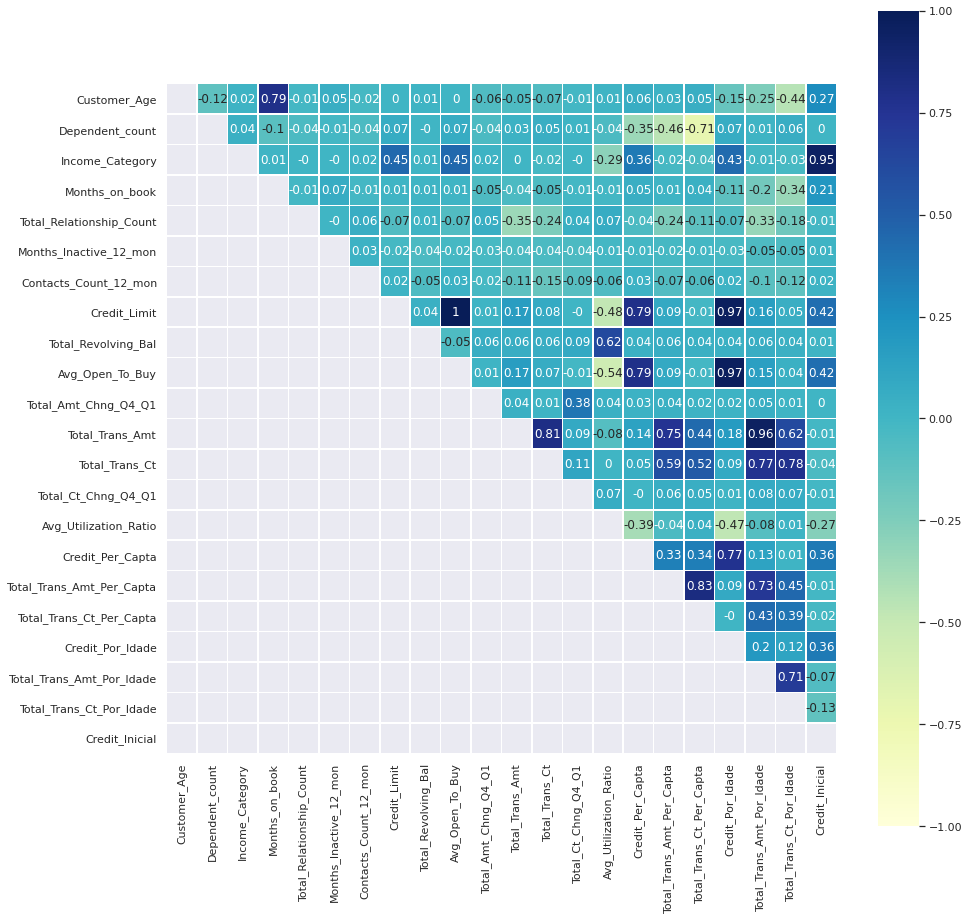

In [44]:
bank_df_corr = ['Customer_Age', 'Dependent_count']
for col in bank_df2.drop(columns=['Customer_Age', 'Dependent_count']) :
        bank_df_corr.append(col)
        
        
sn.set(font_scale=1)
bank_df_corr_cols = bank_df2[bank_df_corr]
bank_df_corr_cols.round(decimals=2)
corrMatrix = bank_df_corr_cols.corr()
mask = np.tril(np.ones_like(corrMatrix, dtype=np.bool))
az = plt.figure(figsize=(15,15))

heatmap = sn.heatmap(corrMatrix.round(decimals=2), mask=mask, linecolor='white', linewidths=.5, 
                     cmap="YlGnBu", vmin=-1, vmax=1, square=True, annot=True)

### Aplicação do OneHotEncoder para transformar variáveis categóricas em numéricas

In [45]:
def one_hot_apply(df: pd.core.frame.DataFrame, features:list):
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    
    for feature in features:
        reshaped_data = df[feature].values.reshape(len(df[feature]),1)
        
        categorys = np.sort(df[feature].unique())
        categorys = [feature + "_" + c for c in categorys]
        encoded_feature = pd.DataFrame(encoder.fit_transform(reshaped_data), columns=categorys)
        
        df.drop(columns=[feature], inplace=True)
        df = pd.concat([df,encoded_feature], axis=1)
        
    return df

In [46]:
bank_df3=one_hot_apply(bank_df, ['Attrition_Flag','Education_Level','Gender','Marital_Status'])

In [124]:
bank_df=bank_df3
bank_df

,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,45,3,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,49,5,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,51,3,4,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,40,4,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,40,3,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10123,41,2,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
10124,44,1,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
10125,30,2,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Inclusão das variáveis Credit_Por_Idade e Credit_Inicial ao dataframe principal

In [127]:
bank_df['Credit_Por_Idade'] = Credit_Por_Idade.round()

In [129]:
bank_df['Credit_Inicial'] = Credit_Inicial.round()

In [130]:
bank_df

,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Credit_Por_Idade,Credit_Inicial
0,45,3,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,282.0,2025
1,49,5,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,168.0,735
2,51,3,4,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67.0,3060
3,40,4,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,83.0,600
4,40,3,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,118.0,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,80.0,1500
10123,41,2,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,104.0,1230
10124,44,1,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,123.0,660
10125,30,2,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,176.0,900


### Separação dos dados em treino e teste, balanceados com base na variável Credit_Por_Idade, com forte correlação com a variável target

In [133]:
train_set, test_set = train_test_split(bank_df, test_size=0.2, random_state=42)

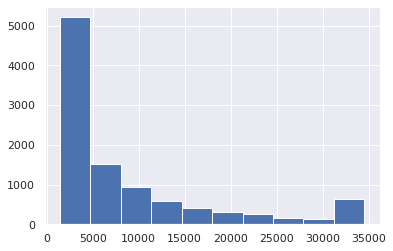

In [134]:
bank_df["Credit_Limit"].hist()

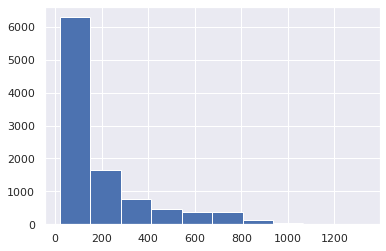

In [52]:
bank_df["Credit_Por_Idade"].hist()

In [53]:
bank_df["Credit_Por_Idade"] = pd.cut(bank_df["Credit_Limit"],
                               bins=[1000, 2000, 3000, 4000, 5000, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [54]:
bank_df["Credit_Por_Idade"].value_counts()

5    4768
2    2032
1    1407
3    1199
4     721
Name: Credit_Por_Idade, dtype: int64

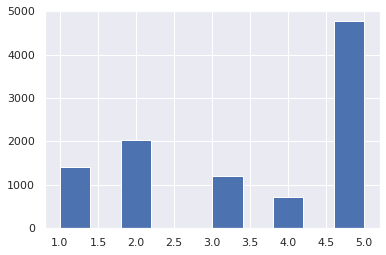

In [55]:
bank_df["Credit_Por_Idade"].hist()

In [56]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(bank_df, bank_df["Credit_Por_Idade"]):
    strat_train_set = bank_df.loc[train_index]
    strat_test_set = bank_df.loc[test_index]

In [57]:
strat_test_set["Credit_Por_Idade"].value_counts() / len(strat_test_set)

5    0.470879
2    0.200888
1    0.138697
3    0.118460
4    0.071076
Name: Credit_Por_Idade, dtype: float64

In [58]:
bank_df["Credit_Por_Idade"].value_counts() / len(bank_df)

5    0.470821
2    0.200652
1    0.138936
3    0.118396
4    0.071196
Name: Credit_Por_Idade, dtype: float64

In [59]:
def Avg_cat_proportions(data):
    return data["Credit_Por_Idade"].value_counts() / len(data)

train_set, test_set = train_test_split(bank_df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": Avg_cat_proportions(bank_df),
    "Stratified": Avg_cat_proportions(strat_test_set),
    "Random": Avg_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [60]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.138936,0.138697,0.131787,-5.145370,-0.171719
2,0.200652,0.200888,0.205331,2.331890,0.117979
3,0.118396,0.118460,0.117966,-0.363128,0.053763
4,0.071196,0.071076,0.076012,6.764489,-0.168270
5,0.470821,0.470879,0.468904,-0.407020,0.012319


In [61]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Credit_Por_Idade", axis=1, inplace=True)

In [62]:
strat_train_set

,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Credit_Inicial
4194,52,4,3,36,4,1,3,9375.0,1625,7750.0,0.532,2108,51,0.500,0.173,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2340
9245,56,2,1,48,2,4,2,4746.0,0,4746.0,0.862,7154,66,1.062,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,840
6774,44,4,2,40,6,5,3,1572.0,874,698.0,0.947,4996,80,0.739,0.556,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1320
7762,38,2,1,36,3,1,1,1461.0,0,1461.0,0.681,4769,76,0.949,0.000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,570
7103,47,5,1,37,5,2,3,1493.0,0,1493.0,0.605,4655,95,0.638,0.000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6786,43,4,1,35,3,3,2,4177.0,2094,2083.0,0.466,3553,66,0.650,0.501,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,645
3554,43,3,3,33,4,3,2,16037.0,0,16037.0,0.558,3048,70,0.750,0.000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1935
4148,47,2,1,32,6,1,3,2493.0,831,1662.0,0.581,4274,68,0.581,0.333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,705
2489,50,2,1,40,5,3,3,2481.0,1287,1194.0,0.465,1825,51,0.821,0.519,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,750


In [63]:
strat_test_set

,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Credit_Inicial
1572,40,3,2,33,4,1,3,21308.0,564,20744.0,0.448,1322,38,0.652,0.026,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1200
2,51,3,4,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3060
6526,52,3,2,36,5,2,2,2498.0,1650,848.0,0.673,4434,79,0.837,0.661,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1560
1968,40,3,4,29,2,2,4,18563.0,0,18563.0,0.729,2395,45,0.552,0.000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2400
8462,44,5,1,28,2,2,2,1558.0,879,679.0,0.874,4805,86,0.792,0.564,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7713,43,2,1,29,4,1,1,3327.0,2517,810.0,0.793,4901,88,0.913,0.757,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,645
5877,37,2,5,23,4,3,3,7607.0,2170,5437.0,0.377,4495,77,0.674,0.285,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2775
28,44,3,6,34,5,2,2,10100.0,0,10100.0,0.525,1052,18,1.571,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3960
5930,52,4,1,39,6,3,1,2035.0,1343,692.0,0.835,4643,86,0.686,0.660,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,780


### Aplicação dos modelos para estimativa periódica do crédito

In [64]:
X_train = strat_train_set.drop("Credit_Limit", axis=1) 
y_train = strat_train_set["Credit_Limit"].copy()

In [65]:
X_test = strat_test_set.drop("Credit_Limit", axis=1) 
y_test = strat_test_set["Credit_Limit"].copy()

### Análise da variável target (dados de treino)

In [66]:
target = y_train
mean = statistics.mean(target)
sd = statistics.stdev(target)
print('Média de Limite de Crédito de treino:', mean, '\nDesvio padrão do límite de crédito de treino:', sd)

Média de Limite de Crédito de treino: 8628.540748055795 
Desvio padrão do límite de crédito de treino: 9095.57664918136


### Distribuição da variável target de treino

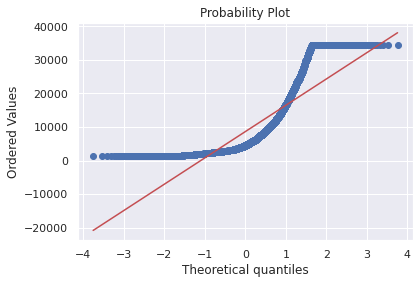

In [67]:
fig = plt.figure()
res = stats.probplot(target, plot=plt)
plt.show()

### Análise da variável target (dados de teste)

In [68]:
mean = statistics.mean(y_test)
sd = statistics.stdev(y_test)
print('Média de Limite de Crédito de teste:', mean, '\nDesvio padrão do límite de crédito de teste:', sd)

Média de Limite de Crédito de teste: 8645.600444225074 
Desvio padrão do límite de crédito de teste: 9063.763388192598


### Distribuição da variável target de teste

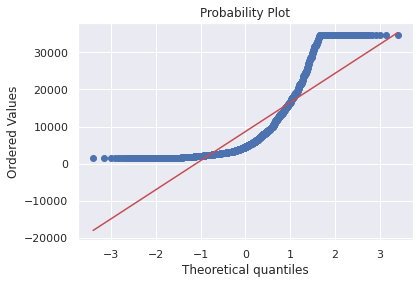

In [69]:
fig = plt.figure()
res = stats.probplot(y_test, plot=plt)
plt.show()

### KNeighborsRegressor

In [70]:
knn_reg = KNeighborsRegressor(n_neighbors=3, n_jobs=-1)
knn_reg.fit(X_train, y_train)

some_data=X_test[200:220]
some_labels=y_test[200:220]

print("Predictions:", knn_reg.predict(some_data)), print("Labels:", some_labels)

Predictions: [ 3483.66666667  1459.86666667  5170.66666667 17907.33333333
  6649.33333333  2760.66666667  8785.         20739.33333333
  5028.          4864.          1461.43333333 34516.
  2036.33333333 15013.33333333  5062.66666667  2235.66666667
  3579.          1438.3         5570.66666667  2298.        ]
Labels: 8846     3569.0
6661     1438.3
7164     5284.0
3479    18064.0
1219     6861.0
8255     2841.0
2129     9095.0
4958    20485.0
8569     5027.0
3304     4717.0
5257     1515.0
9383    34516.0
3919     2097.0
9364    15594.0
6674     5393.0
7385     2330.0
9662     3423.0
7519     1438.3
532      5504.0
1670     2205.0
Name: Credit_Limit, dtype: float64


(None, None)

### Erros: RMSE e MAE KNeighborsRegressor

In [71]:
quality_predictions = knn_reg.predict(X_test)
knn_mse = mean_squared_error(y_test, quality_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test, quality_predictions)

knn_rmse, knn_mae

(237.36542118722065, 160.32862783810467)

### Busca dos Melhores Parâmetros do KNeighborsRegressor

In [72]:
grid_params = {
    'n_neighbors': [1,2,3,50],
    'weights': ['uniform', 'distance'],
    'metric':['minkowski','manhattan']
}

gsknn = GridSearchCV(KNeighborsRegressor(), grid_params, verbose=1, cv=3, n_jobs=-1)

gsknn_results = gsknn.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    5.9s finished


In [73]:
gsknn_results.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')

### Aplicação dos Melhores Parâmetros ao KNeighborsRegressor

In [74]:
knn_regf=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                    weights='distance')
knn_regf.fit(X_train, y_train)

some_data=X_test[200:220]
some_labels=y_test[200:220]

print("Predictions:", knn_regf.predict(some_data)), print("Labels:", some_labels)

Predictions: [ 3554.48352469  1460.72872538  5152.89404208 17892.29094373
  6691.81809288  2767.74614549  8778.29387029 20694.02123516
  5000.61317659  4879.17676375  1469.27199354 34516.
  2064.51102409 15022.10910762  5054.58050844  2246.76857116
  3553.35187906  1438.3         5596.00203099  2297.79597371]
Labels: 8846     3569.0
6661     1438.3
7164     5284.0
3479    18064.0
1219     6861.0
8255     2841.0
2129     9095.0
4958    20485.0
8569     5027.0
3304     4717.0
5257     1515.0
9383    34516.0
3919     2097.0
9364    15594.0
6674     5393.0
7385     2330.0
9662     3423.0
7519     1438.3
532      5504.0
1670     2205.0
Name: Credit_Limit, dtype: float64


(None, None)

### Cálculo da Raiz Quadrática Média dos Erros e do Erro Absoluto Médio com os Melhores Parâmetros do KNeighborsRegressor

In [75]:
quality_predictions = knn_regf.predict(X_test)
knn_mse = mean_squared_error(y_test, quality_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test, quality_predictions)

knn_rmse, knn_mae

(224.91571815049423, 151.10569461401116)

### Validação Cruzada do KNeighborsRegressor

In [76]:
scores = cross_val_score(knn_regf,  
                         X=X_train,
                         y=y_train,
                         scoring="neg_mean_squared_error", cv=10)
knn_reg_rmse_scores = np.sqrt(-scores)

In [77]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(knn_reg_rmse_scores)

Scores: [244.41635501 236.47419467 240.41002264 237.20981841 240.45522912
 256.82789949 248.36131173 248.12634996 250.259188   247.96800566]
Mean: 245.05083746860896
Standard deviation: 6.106174907683948


### Modelo DecisionTreeRegressor

In [78]:
tree_reg = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=42))
tree_reg.fit(X_train, y_train)

some_data=X_test[200:220]
some_labels=y_test[200:220]

print("Predictions:", tree_reg.predict(some_data)), print("Labels:", some_labels)

Predictions: [ 3616.   1438.3  5240.  17925.   6805.   2837.   9090.  20543.   5039.
  4844.   1507.  34516.   2097.  15987.   5444.   2281.   3352.   1438.3
  5335.   2221. ]
Labels: 8846     3569.0
6661     1438.3
7164     5284.0
3479    18064.0
1219     6861.0
8255     2841.0
2129     9095.0
4958    20485.0
8569     5027.0
3304     4717.0
5257     1515.0
9383    34516.0
3919     2097.0
9364    15594.0
6674     5393.0
7385     2330.0
9662     3423.0
7519     1438.3
532      5504.0
1670     2205.0
Name: Credit_Limit, dtype: float64


(None, None)

### Erros: RMSE e MAE do DecisionTreeRegressor

In [79]:
quality_predictions = tree_reg.predict(X_test)
tree_reg_mse = mean_squared_error(y_test, quality_predictions)
tree_reg_rmse = np.sqrt(tree_reg_mse)
tree_reg_mae = mean_absolute_error(y_test, quality_predictions)

tree_reg_rmse, tree_reg_mae

(155.49081118916502, 82.02018756169811)

### Busca dos Melhores Parâmetros do DecisionTreeRegressor

In [80]:
tree_reg = DecisionTreeRegressor(random_state=42)

depths = np.arange(1, 21)
param_grid = {'criterion':["mse", "friedman_mse", "mae"],'max_depth':[4,5,6,7,8,10,12,17]}

grid = GridSearchCV(tree_reg, param_grid=param_grid, cv=10)
grid_results = grid.fit(X_train, y_train)

In [81]:
grid_results.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=17,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

### Aplicação dos Melhores Parâmetros ao DecisionTreeRegressor. 

In [82]:
tree_regf = make_pipeline(StandardScaler(), DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=17,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best'))
tree_regf.fit(X_train, y_train)

some_data=X_test[200:220]
some_labels=y_test[200:220]

print("Predictions:", tree_regf.predict(some_data)), print("Labels:", some_labels)

Predictions: [ 3616.   1484.   5230.  17925.   6836.   2830.   9090.  20614.   5039.
  4844.   1507.  34516.   2097.  15987.   5471.   2294.   3390.   1438.3
  5363.   2253. ]
Labels: 8846     3569.0
6661     1438.3
7164     5284.0
3479    18064.0
1219     6861.0
8255     2841.0
2129     9095.0
4958    20485.0
8569     5027.0
3304     4717.0
5257     1515.0
9383    34516.0
3919     2097.0
9364    15594.0
6674     5393.0
7385     2330.0
9662     3423.0
7519     1438.3
532      5504.0
1670     2205.0
Name: Credit_Limit, dtype: float64


(None, None)

### Cálculo da Raiz Quadrática Média dos Erros e do Erro Absoluto Médio com os Melhores Parâmetros do DecisionTreeRegressor

In [83]:
quality_predictions = tree_regf.predict(X_test)
tree_reg_mse = mean_squared_error(y_test, quality_predictions)
tree_reg_rmse = np.sqrt(tree_reg_mse)
tree_reg_mae = mean_absolute_error(y_test, quality_predictions)

tree_reg_rmse, tree_reg_mae

(148.1204237579159, 80.69001017080996)

### Validação Cruzada do DecisionTreeRegressor

In [84]:
scores = cross_val_score(tree_regf,  
                         X=X_train,
                         y=y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_reg_rmse_scores = np.sqrt(-scores)

In [85]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_reg_rmse_scores)

Scores: [140.24052624 152.36093839 194.09680486 140.06475428 130.89602047
 148.46596824 153.48306008 162.3568989  162.67239157 129.1949699 ]
Mean: 151.38323329276645
Standard deviation: 18.029154310657116


### Modelo Gradiente Descendente Estócastico

In [86]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=10000))
reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=10000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [87]:
reg.predict(X_train)

array([9375.79476909, 4746.31989648, 1571.78757328, ..., 2493.07445754,
       2480.52163116, 4288.95204382])

In [88]:
reg.score(X_train, y_train)

0.9999999808242641

In [89]:
reg.fit(X_test, y_test)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=10000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [90]:
reg.predict(X_test)

array([21306.03909728,  3419.8070734 ,  2498.00676127, ...,
       10100.91987776,  2034.76938092,  9410.40150502])

In [91]:
reg.score(X_test, y_test)

0.9999999763413591

### Erros: RMSE e MAE do Gradiente Descendente Estocástico

In [92]:
quality_predictions = reg.predict(X_test)
reg_mse = mean_squared_error(y_test, quality_predictions)
reg_rmse = np.sqrt(reg_mse)
reg_mae = mean_absolute_error(y_test, quality_predictions)

print('RMSE:', tree_reg_rmse,'\nMAE:', tree_reg_mae)

RMSE: 148.1204237579159 
MAE: 80.69001017080996


### Validação Cruzada do Gradiente Descendente Estocástico

In [93]:
scores = cross_val_score(reg,  
                         X=X_train,
                         y=y_train,
                          cv=2)

In [94]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_reg_rmse_scores)

Scores: [140.24052624 152.36093839 194.09680486 140.06475428 130.89602047
 148.46596824 153.48306008 162.3568989  162.67239157 129.1949699 ]
Mean: 151.38323329276645
Standard deviation: 18.029154310657116


# Classificação

### Nessa seção, o objetivo é classificar se um cliente vai fechar a conta em algum espaço de tempo, ou se permanecerá com a conta aberta

In [180]:
bank_df

,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Credit_Por_Idade,Credit_Inicial
0,45,3,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,282.0,2025
1,49,5,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,168.0,735
2,51,3,4,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67.0,3060
3,40,4,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,83.0,600
4,40,3,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,118.0,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,80.0,1500
10123,41,2,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,104.0,1230
10124,44,1,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,123.0,660
10125,30,2,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,176.0,900


### Aplicando o OneHotEncoder

In [181]:
# encoded_df = one_hot_apply(bank_df, ['Gender', 'Education_Level',
#        'Marital_Status', 'Income_Category'])

### Eliminando algumas colunas que não são úteis, como se o cliente já encerrou sua conta ou não. Não levamos em conta as colunas citadas, pois consideramos apenas o tempo que o cliente fez o uso da sua conta no banco, ou seja, alguem que fechou sua conta depois de 36 meses de uso tem o mesmo valor que alguém que ainda é cliente e usa a sua conta há 36 meses.

In [182]:
encoded_df = bank_df.drop(columns=["Attrition_Flag_Attrited Customer", "Attrition_Flag_Existing Customer"])
encoded_df

,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Credit_Por_Idade,Credit_Inicial
0,45,3,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,282.0,2025
1,49,5,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,168.0,735
2,51,3,4,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67.0,3060
3,40,4,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,83.0,600
4,40,3,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,118.0,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,80.0,1500
10123,41,2,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,104.0,1230
10124,44,1,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,123.0,660
10125,30,2,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,176.0,900


### Dividindo os clientes em 3 classes, se usou sua conta por 1 ano ou menos, entre 1 ano e 2 anos ou 3 anos ou mais.

In [183]:
customer_class = []
i = 0
for row in encoded_df["Months_on_book"]:
    if row <= 24:
        i = 0
    elif row <= 36:
        i = 1
    elif row > 36:
        i = 2
        
    customer_class.append(i) 

In [184]:
encoded_df["Customer_Class"] = customer_class
encoded_df.drop(columns=["Months_on_book"], inplace=True)

In [185]:
encoded_df["Customer_Class"].value_counts()

1    5418
2    3862
0     847
Name: Customer_Class, dtype: int64

### A função best_estimator aplica uma pipeline que normaliza os dados e utiliza uma variancia que elimina as features que forem menor que um certo limiar. Após isso aplicamos essa Pipeline em um GridSearch para encontrar os melhores hiperparâmetros para cada modelo

In [186]:
X = encoded_df.drop(columns=['Customer_Class'])
y = encoded_df['Customer_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def best_estimator(cls, params, cv=5):
    pipe = Pipeline(steps=[('scale', StandardScaler()),
                           ('var', VarianceThreshold()),
                           #("over", SMOTE(sampling_strategy="minority", n_jobs=-1)),
                           ('cls', cls)])
    gs = GridSearchCV(estimator=pipe, 
                  param_grid=params,
                  cv=cv,
                  n_jobs=-1)
    
    gs.fit(X_train, y_train)
    return gs

In [187]:
param_range = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
lr_param = {
            'cls__fit_intercept' : [True, False],
            'cls__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'cls__C' : param_range
}

gnb_param = {
            'cls__var_smoothing' : [10**-9]
}

knn_param = {
            'cls__n_neighbors' : [_ for _ in range(2,21)],
            'cls__weights' : ['uniform', 'distance'],
            'cls__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

rf_param = {
            'cls__n_estimators' : [_ for _ in range(5, 20, 5)],
            'cls__criterion' : ['gini', 'entropy'],
            'cls__max_depth' : [_ for _ in range(2, 11, 2)],
            'cls__min_samples_split' : [_ for _ in range(2,6)],
            'cls__min_samples_leaf' : [_ for _ in range(1, 6)],
            'cls__max_features' : ['auto', 'sqrt', 'log2']
}



In [188]:
models = [(LogisticRegression(n_jobs=-1), lr_param),
          (GaussianNB(), gnb_param), (KNeighborsClassifier(n_jobs=-1), knn_param), 
          (RandomForestClassifier(n_jobs=-1), rf_param)]

In [189]:
for model in models:
    model[1]["var__threshold"] = np.linspace(0, 0.5, 11)

In [ ]:
models_gs = []

for model in models:
    print(model[0])
    pipe = model[0]
    params = model[1]
    models_gs.append(best_estimator(pipe, params))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.



GaussianNB(priors=None, var_smoothing=1e-09)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


## Logistic Regression

### Melhores hiperparâmetros

In [ ]:
models_gs[0].best_params_

In [ ]:
lr = models_gs[0]
lr.best_estimator_.fit(X_train, y_train)
lr_pred = lr.best_estimator_.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, lr_pred)

In [ ]:
lr.best_estimator_["var"].get_support(True)

In [ ]:
len(encoded_df.columns)

In [ ]:
len(lr.best_estimator_['cls'].coef_[0])

## Gaussian Naive Bayes

### Melhores hiperparâmetros

In [ ]:
models_gs[1].best_params_

In [ ]:
gnb = models_gs[1]
gnb.best_estimator_.fit(X_train, y_train)
gnb_pred = gnb.best_estimator_.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, gnb_pred)

## KNN

### Melhores hiperparâmetros

In [ ]:
models_gs[2].best_params_

In [ ]:
knn = models_gs[2]
knn.best_estimator_.fit(X_train, y_train)
knn_pred = knn.best_estimator_.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, knn_pred)

## Random Forest

### Melhores hiperparâmetros

In [ ]:
models_gs[3].best_params_

In [ ]:
rf = models_gs[3]
rf.best_estimator_.fit(X_train, y_train)
rf_pred = rf.best_estimator_.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, rf_pred)

## Métricas

In [ ]:
metrics_df = pd.DataFrame(None)
estimators = ['Regressão Logística', 'Naive Bayes Gaussiano','KNN', 'Random Forest']
predictions = [lr_pred, knn_pred, rf_pred, gnb_pred]

i = 0
for pred in predictions:
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="weighted")
    recall = recall_score(y_test, pred, average="weighted")
    f1 = f1_score(y_test, pred, average="weighted")

    row = pd.DataFrame([estimators[i], accuracy, precision, recall, f1]).T
    metrics_df = pd.concat([metrics_df, row], ignore_index=True)
    i += 1

metrics_df.columns = ['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1-score']
metrics_df.set_index('Modelo')